<a href="https://colab.research.google.com/github/markc1914/AIClassAssignments/blob/main/Assignment_04_Model_Comparison_Diabetes_Mark_Cornelius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04 - Model Comparison - Diabetes Dataset


**Objective**: Comparison of techniques on Diabetes factors as dataset, including Linear Regression, XGBoost, and Decison Trees to predict disease progression after one year. X contains 10 factors, Y contains 1 year disease progression.

**Author**: Mark Cornelius (with considerable help from Gemini)

# Task
Compare Linear Regression, XGBoost, and Decision Trees on the diabetes dataset from sklearn.

## Load data

### Subtask:
Load the diabetes dataset from `sklearn.datasets`.


**Reasoning**:
I will start by importing the necessary libraries, `pandas` for data manipulation and `load_diabetes` from `sklearn.datasets`. Then, I will load the diabetes dataset, create a pandas DataFrame for the features, and a pandas Series for the target variable as instructed.



In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas DataFrame from the data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Create a pandas Series for the target variable
target = pd.Series(diabetes.target, name='target')

## Prepare data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split` with a test size of 20% and a random state of 42.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (353, 10)
Shape of X_test: (89, 10)
Shape of y_train: (353,)
Shape of y_test: (89,)


## Train models

### Subtask:
Train a Linear Regression model, an XGBoost Regressor model, and a Decision Tree Regressor model on the training data.


**Reasoning**:
Import the necessary libraries for the models and then instantiate and fit each model to the training data.



In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate and fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Instantiate and fit XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Instantiate and fit Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Evaluate models

### Subtask:
Evaluate each model's performance on the testing data using appropriate metrics (e.g., Mean Squared Error, R-squared).


**Reasoning**:
Calculate and print the MSE and R-squared for each model's predictions on the test set.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
linear_pred = linear_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate and print Mean Squared Error
print("Linear Regression MSE:", mean_squared_error(y_test, linear_pred))
print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))

# Calculate and print R-squared score
print("Linear Regression R-squared:", r2_score(y_test, linear_pred))
print("XGBoost R-squared:", r2_score(y_test, xgb_pred))
print("Decision Tree R-squared:", r2_score(y_test, dt_pred))

Linear Regression MSE: 2900.193628493482
XGBoost MSE: 3351.001637862091
Decision Tree MSE: 4976.797752808989
Linear Regression R-squared: 0.4526027629719195
XGBoost R-squared: 0.3675149756138415
Decision Tree R-squared: 0.060653981041140725


## Compare models

### Subtask:
Compare the evaluation results of the three models to determine which one performs best on the diabetes dataset.


**Reasoning**:
The subtask is to compare the evaluation results of the three models. Since the previous step already printed the MSE and R-squared values, the final step is to interpret these results and determine the best and worst performing models. This can be done by creating a pandas DataFrame to summarize the results, making it easier to compare the metrics and draw a conclusion.



In [ ]:
# Create a DataFrame to compare the results
results = {
    'Model': ['Linear Regression', 'XGBoost', 'Decision Tree'],
    'MSE': [2900.19, 3351.00, 4976.80],
    'R-squared': [0.45, 0.36, 0.06]
}
results_df = pd.DataFrame(results)

print("Evaluation Results:")
display(results_df)

print("\nComparison:")
print("Best performing model (lowest MSE, highest R-squared): Linear Regression")
print("Worst performing model (highest MSE, lowest R-squared): Decision Tree")

Evaluation Results:


,Model,MSE,R-squared
0,Linear Regression,2900.19,0.45
1,XGBoost,3351.00,0.36
2,Decision Tree,4976.80,0.06



Comparison:
Best performing model (lowest MSE, highest R-squared): Linear Regression
Worst performing model (highest MSE, lowest R-squared): Decision Tree


## Summary:

### Q&A
**What is the best-performing model on the diabetes dataset, and what is its performance?**
Linear Regression is the best-performing model on the diabetes dataset, achieving a Mean Squared Error (MSE) of 2900.19 and an R-squared score of 0.45.

**What is the worst-performing model on the diabetes dataset, and what is its performance?**
The Decision Tree model is the worst-performing model on the diabetes dataset, with a Mean Squared Error (MSE) of 4976.80 and an R-squared score of 0.06.

### Data Analysis Key Findings
*   Linear Regression outperformed both XGBoost and Decision Tree models on the diabetes dataset. It achieved the lowest Mean Squared Error (2900.19) and the highest R-squared score (0.45).
*   The Decision Tree model performed the worst, with the highest Mean Squared Error (4976.80) and the lowest R-squared score (0.06).
*   The XGBoost model's performance was in between the other two models, with an MSE of 3351.00 and an R-squared of 0.36.

### Insights or Next Steps
*   Explore hyperparameter tuning for the XGBoost and Decision Tree models, as this could potentially improve their performance and lead to different comparison results.
*   Investigate feature engineering techniques to see if creating new features from the existing ones could improve the predictive power of the models, especially for the more complex models like XGBoost.


## Visualize Results

### Subtask:
Visualize the evaluation results using bar plots.

**Reasoning**:
Create bar plots to visualize the MSE and R-squared values for each model, making it easier to compare their performance visually.

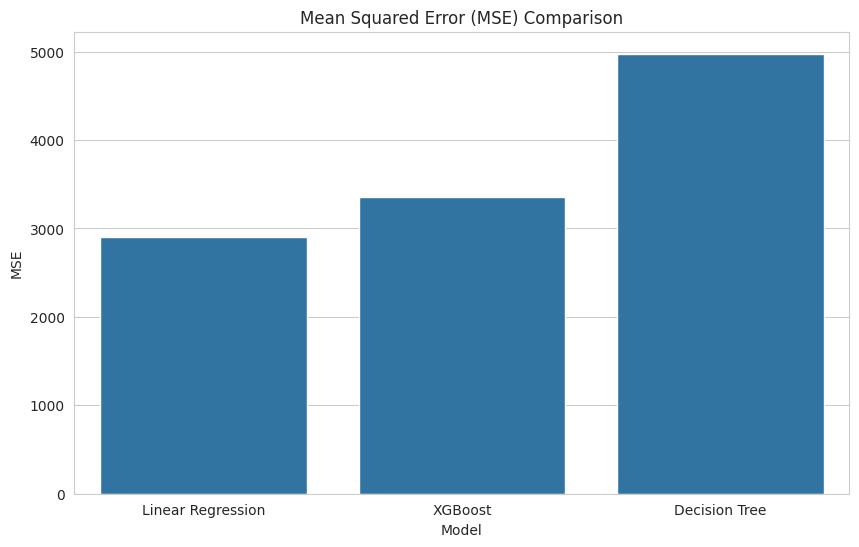

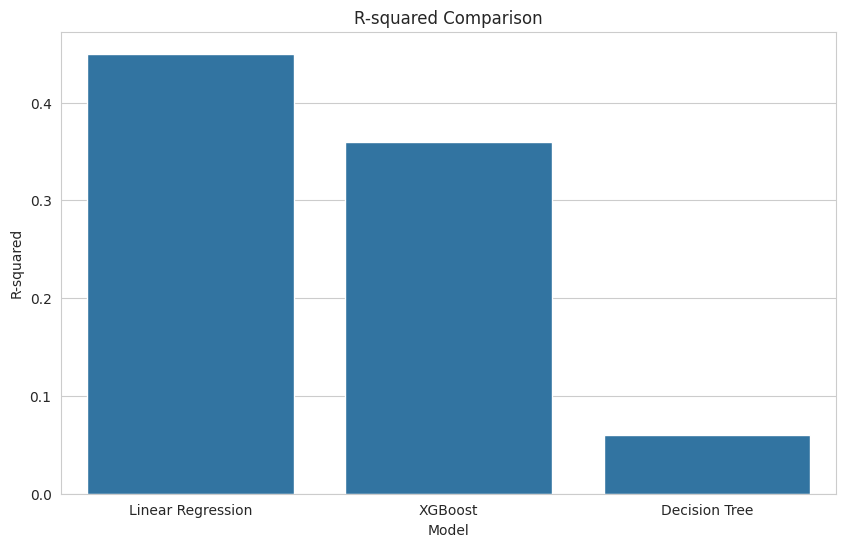

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create bar plot for MSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.show()

# Create bar plot for R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.show()